In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from numba import jit


In [47]:
N = 10000
n = 1000
Lambda = 5

#### ***Теоритическая справка***

Пуассоновский процесс – это случайный процесс, который описывает случайные события, происходящие в непрерывном времени и пространстве. Основным свойством пуассоновского процесса является то, что число событий, происходящих в заданном интервале времени или пространства, имеет распределение Пуассона.

Пуассоновский процесс определяется тремя параметрами:

\\(\lambda\\) – интенсивность процесса, т.е. среднее число событий, происходящих в единицу времени или пространства;

\\(t\\) – время или пространство;

\\(N(t)\\) – случайная величина, представляющая число событий, произошедших к моменту времени 
 или на пространстве .

#### ***Свойства пуассоновского процесса***

 1. **Независимость приращений** - означает, что число событий, происходящих в непересекающихся интервалах времени или пространства, являются независимыми случайными величинами.

(если в первый час произошло 3 события, а во второй час – 2 события, то количество событий в каждом часу независит от количества событий в другом часу).

2. **Однородность** - означает, что вероятность появления события в заданном интервале времени или пространства не зависит от времени или пространства.

(если интенсивность процесса составляет 2 события в час, то вероятность появления одного события в течение 1 часа будет равна 2/1 = 2).

3. **Распределение Пуассона** - Свойство распределения Пуассона означает, что число событий, происходящих в заданном интервале времени или пространства, имеет распределение Пуассона.
Формула для расчета вероятности \\(P(N(t) = k)\\)
 (что произойдет \\(k\\) событий за время \\(t\\)) в пуассоновском процессе выглядит следующим образом:

\\[P(N(t) = k) = \frac{e^{-\lambda t}(\lambda t)^k}{k!}\\]


![Мое изображение](data/1.png)

## Task1

![Мое изображение](data/2.png)

In [60]:
@jit(nopython=True)
def algorithm1 (Lambda : float, n : int, N : int ) -> Tuple [List[int],List[float]]:
    
    p = min (Lambda/n, 1)
    points = np.linspace(0,1,n+1)

    intervals = [(points[i], points[i+1]) for i in range (n)]

    #distance between intervals with success
    distances  = []

    #number of successes in experiments
    amount_success = []

    for i in range (N):
        #Number of successes in one experiment
        success = 0
        success_intervals = []

        for idx in range(n):
            p_for_interval = np.random.rand()
            if p_for_interval<=p :
                success +=1
                success_intervals.append (intervals[idx])
        
        amount_success.append(success)

        if len(success_intervals) > 1:
            for idx in range (len(success_intervals) - 1):
                
                #obtain the distance between successes as the distance between the midpoints of the corresponding intervals
                dist = success_intervals[idx+1][0] - success_intervals[idx][1]
                distances.append(dist)
        
    return amount_success, distances         

In [61]:
amount_succes1, distances1 = algorithm1 (Lambda, n, N)

In [62]:
def sturges_rule (N : int) -> int:
    return int(1+np.floor(np.log2(N)))

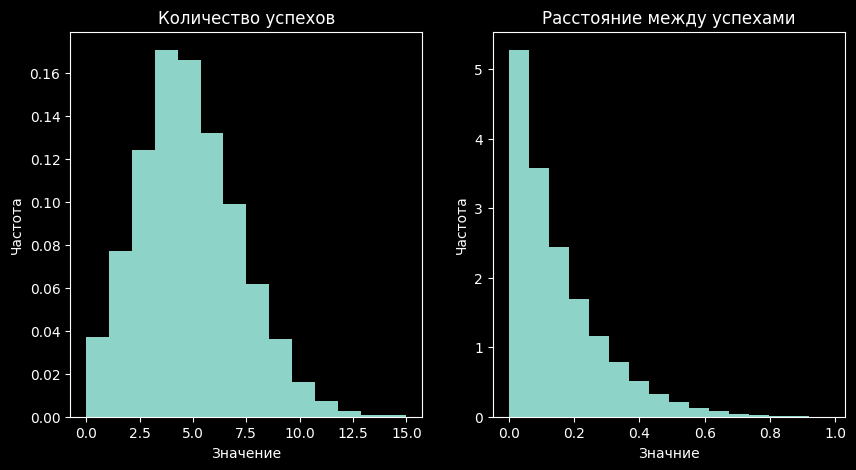

In [63]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 5))

plt.subplot (1,2,1)
m1 = sturges_rule(N)
plt.hist(amount_succes1, bins = m1,  density=True)
plt.title('Количество успехов')
plt.xlabel('Значение')
plt.ylabel('Частота')


plt.subplot (1,2,2)
m2 = sturges_rule(len(distances1))
plt.hist(distances1, bins = m2,  density=True)
plt.title('Расстояние между успехами')
plt.xlabel('Значние')
plt.ylabel('Частота')


plt.show()

![Мое изображение](data/3.png)

## Task2

![Мое изображение](data/4.png)

 ***Справка***

Для моделирования случайных величин используется алгоритм, основывающийся на соотношении распределения Пуассона с параметром \\(\lambda\\) и экспоненциального распределения с параметром \\(\frac{1}{\lambda}\\). Таким образом, для генерирования выборки из псевдослучайной величины \\(X \sim P(\lambda)\\) выполняются следующие операции:

1. Принимается \\(a = e^{-\lambda}\\), \\(b = 1\\) и \\(i = 0\\).

2. Генерируется псевдослучайное число \\(u_{i+1} \sim U(0, 1)\\) из непрерывного равномерного распределения на отрезке \\((0, 1)\\), после чего присваиваются значения \\(b = b \cdot u_{i+1}\\).

3. Если \\(b < a\\), то возвращается значение \\(x = i\\), в противном случае происходит переход к шагу 2 при \\(i = i + 1\\).


In [52]:
@jit(nopython=True)
def generation_random_var_Puasson(Lambda : int) -> int:
    a = np.exp(-Lambda)
    b = 1
    i = 0
    
    while b>=a :
        u = np.random.uniform(0,1)
        b*= u
        i+= 1
    return i

In [64]:
@jit(nopython=True)
def algorithm2 (Lambda : float, N : int ) -> List[float] :
    
    #distance between intervals with success
    distances  = []

    for i in range (N):
        X = generation_random_var_Puasson(Lambda)
        
        points = np.random.uniform (0,1, X)
        
        points.sort()
        
        if X > 1:
            for idx in range (len(points) - 1):
                dist = points[idx+1] - points[idx]
                distances.append(dist)
    return distances
        

In [65]:
distances2 = algorithm2 (Lambda,N)

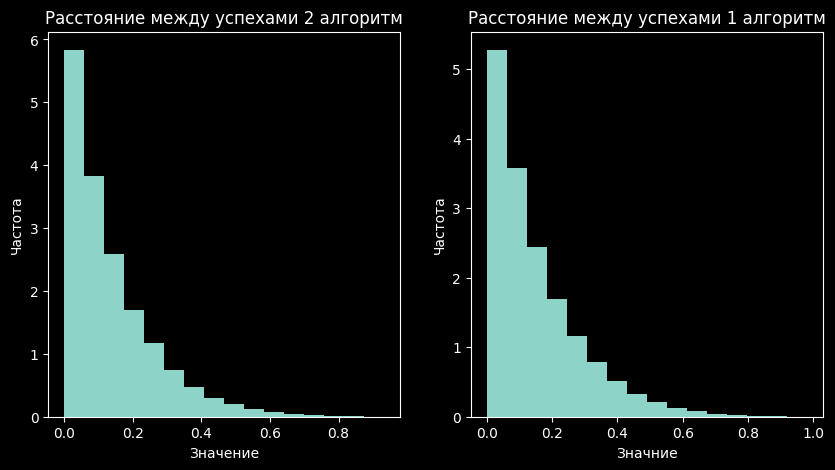

In [66]:
plt.figure(figsize=(10, 5))

plt.subplot (1,2,1)
m3 = sturges_rule(len(distances2))
plt.hist(distances2, bins = m3,  density=True)
plt.title('Расстояние между успехами 2 алгоритм')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.subplot (1,2,2)
m2 = sturges_rule(len(distances1))
plt.hist(distances1, bins = m2,  density=True)
plt.title('Расстояние между успехами 1 алгоритм')
plt.xlabel('Значние')
plt.ylabel('Частота')

plt.show()

## Task3-4

![Мое изображение](data/5.png)

![Мое изображение](data/6.png)

 ***Справка***
Экспоненциальное распределение с математическим ожиданием \\(\lambda\\) > 0 характеризуется функцией плотности вероятности:

\\[f(x) = \lambda e^{-\lambda x} , (x\geq 0)\\]

Для моделирования случайных величин использован метод обратного преобразования, позволяющий при наличии генератора случайной величины из стандартного непрерывного равномерного распределения получить случайную величину из экспоненциального распределения, задаваемого функцией:

\\[F(x) = 1 - e^{-\lambda x} \\]

Генерирование случайной величины, подчиняющейсяся экспоненциальному распределению с заданным параметром λ, производится путём выполнения следующих операций:

1. Генерируется псевдослучайное число \\(u \sim U(0, 1)\\) из непрерывного равномерного распределения на отрезке \\((0, 1)\\).

2. На основании обратной функции \\(F^{-1}(u)\\) вычисляется искомая случайная величина из заданного экспоненциального распределения по формуле:


\\[X = - \frac{1}{\lambda} \ln(1 - u)\\]


*\\( F^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u) \\)

Источник : https://help.fsight.ru/ru/mergedProjects/lib/05_statistics/distribution/lib_exponentialdistribution.htm

In [56]:
@jit(nopython = True)
def generation_random_var_exp (Lambda : int) :
    u = np.random.uniform(0,1)
    x = - np.log(1- u) / Lambda 
    return x

In [57]:
@jit(nopython = True)
def algorithm3 (Lambda : int, N : int) -> np.double:
    #number of successes in experiments
    amount_success = []

    for i in range (N):
        #Number of successes in one experiment
        success = 0
        s = 0

        while s<1:
            x = generation_random_var_exp(Lambda)
            s+=x
            success +=1
        amount_success.append(success)
    return amount_success
        

In [58]:
amount_succes2 = algorithm3 (Lambda, N)

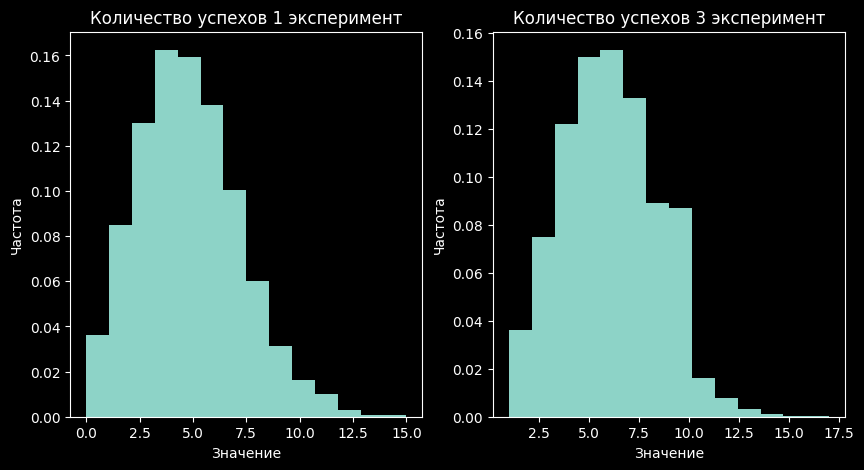

In [59]:
plt.figure(figsize=(10, 5))

plt.subplot (1,2,1)
m1 = sturges_rule(N)
plt.hist(amount_succes1, bins = m1,  density=True)
plt.title('Количество успехов 1 эксперимент')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.subplot (1,2,2)
m3 = sturges_rule(N)
plt.hist(amount_succes2, bins = m3,  density=True)
plt.title('Количество успехов 3 эксперимент')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()